# NAVDEEP MEHTA
## Coures = Internship at The Sparks Foundation
## Task = Prediction using Supervised ML
### E-mail = navdeepmehta884@gmail.com

In [2]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.shape

(25, 2)

In [8]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_count'] = df.nunique()

In [11]:
temp

,data_type,null_count,unique_count
Hours,float64,0,23
Scores,int64,0,23


Text(0.5, 1.0, 'Distribution Between hours and scores')

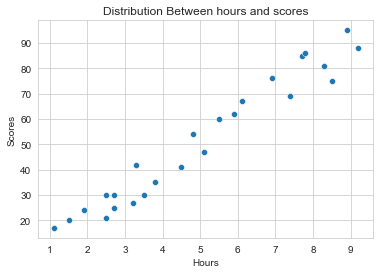

In [12]:
sns.set_style('whitegrid')
sns.scatterplot(x='Hours',y='Scores',data=df)
plt.title("Distribution Between hours and scores")

In [13]:
X= df.drop('Scores',axis=1)
Y= df.drop('Hours',axis=1)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
model.fit(X_train,Y_train)

LinearRegression()

In [18]:
from sklearn.metrics import mean_absolute_error as mae
pre=model.predict(X_test)
k= mae(pre,Y_test)
print(f"Mean Absolute Error is = {k}")

Mean Absolute Error is = 4.419727808027652


In [19]:
sc=model.score(X,Y)
print(sc)

0.9529426789332803


In [20]:
from sklearn.metrics import mean_squared_error
err=mean_squared_error(Y_test,pre)
r_err=np.sqrt(err)
print(r_err)

4.792191274636315


In [21]:
model.coef_

array([[9.78856669]])

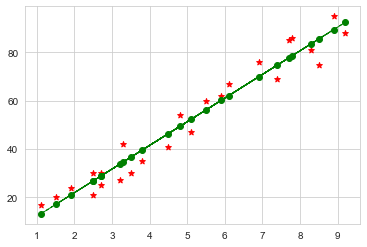

In [22]:
line = model.coef_*X+model.intercept_
plt.scatter(X, Y,color='r',marker='*')
plt.plot(X, line,color='g',marker='o',linestyle='dashed',linewidth =1);

In [23]:
pre

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [24]:
pre=pd.DataFrame(pre)

In [25]:
Y_test1=pd.DataFrame(Y_test).reset_index()
Y_test1.drop('index',axis=1,inplace=True)

In [26]:
df1 = Y_test1.join(pre)

In [27]:
df1=df1.rename(columns={'Scores':'Actual Scores',0:'Predict Scores'})

In [28]:
df1

,Actual Scores,Predict Scores
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Predict Scores', ylabel='Density'>

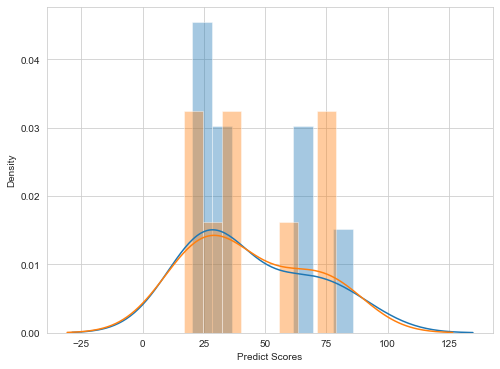

In [29]:
plt.figure(figsize=(8,6))
sns.distplot(df1['Actual Scores'],bins=8)
sns.distplot(df1['Predict Scores'],bins=8)

Text(0.5, 1.0, 'Actual and Predicted value of the score')

<Figure size 1440x720 with 0 Axes>

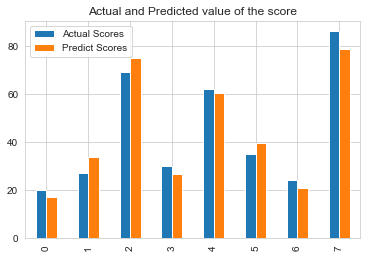

In [30]:
plt.figure(figsize=(20,10))
df1.plot(kind='bar')
plt.title('Actual and Predicted value of the score')

In [31]:
hours = [9.25]
predi = pd.DataFrame(hours)
own_pred = model.predict(predi)
print(f"Predicted Score for study of {hours} = {own_pred}")


Predicted Score for study of [9.25] = [[92.91505723]]


In [32]:
lst=[]
n=int(input('Enter how many hour u want to enter'))
for i in range(0, n): 
    print(f'Enter {i+1} value of hour')
    ele = float(input())
    lst.append(ele)
predict = pd.DataFrame(lst)
own_predection = model.predict(predict)
for i in range(0, n):
    print(f"Predicted Score for study of {lst[i]}  = {own_predection[i]}")


Enter how many hour u want to enter3
Enter 1 value of hour
3.5
Enter 2 value of hour
4.5
Enter 3 value of hour
4.7
Predicted Score for study of 3.5  = [36.63079879]
Predicted Score for study of 4.5  = [46.41936547]
Predicted Score for study of 4.7  = [48.37707881]
